## Gymnasium Demo

本`Notebook`主要介绍如何使用`Gymnasium`环境接口，便于用户更好地理解如何使用`Gymnasium`进行强化学习算法的研究实践。


### 1. Gymnasium简介

`Gymnasium` 是一个用于 强化学习（Reinforcement Learning, RL） 的模拟环境库，由 OpenAI Gym 发展而来。它为研究人员和开发者提供了标准化的测试环境，使得不同的强化学习算法可以在相同的条件下进行比较和评估。

注意，由于不同的`Gymnasium`版本之间的接口可能有所不同，因此在初学者在使用`Gymnasium`时，建议固定版本，例如本教程中固定版本为`pip install gymnasium==0.29.1`。

一个简单的`Gymnasium`环境调用示例如下：

In [9]:
import gymnasium as gym

env = gym.make('CartPole-v1') # 创建环境
obs, info = env.reset() # 重置环境, 返回状态和其他信息
ep_reward = 0 # 记录回合总奖励
for _ in range(10):
    # env.render()
    action = env.action_space.sample() # 随机动作
    next_obs, reward, terminated, trucated, info = env.step(action) # 执行动作，并返回下一个状态，奖励，是否结束，其他信息
    ep_reward += reward
    if terminated or trucated:
        break
print('回合总奖励:', ep_reward)
env.close()

回合总奖励: 10.0


### 2. 更多环境调用

[官方文档](https://gymnasium.farama.org/) 对所有提供的环境都有详细的介绍，用户可以根据自己的需求选择合适的环境进行实验。如图：
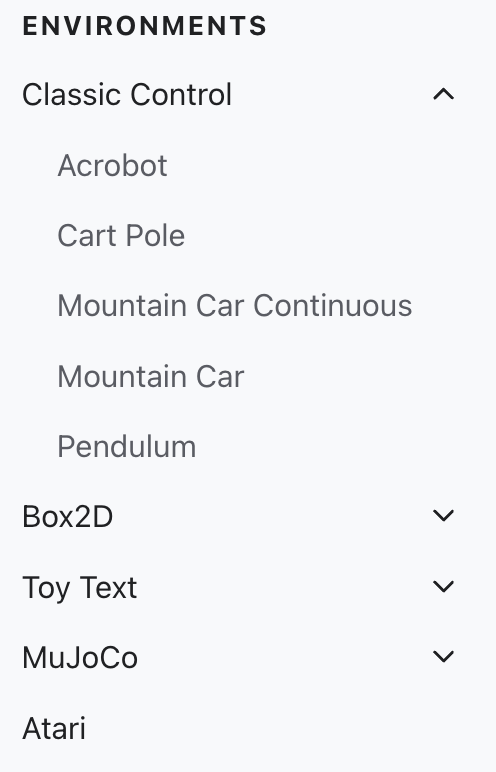

点击对应的环境名称，例如CartPole，就可以查看详细信息了，如图：
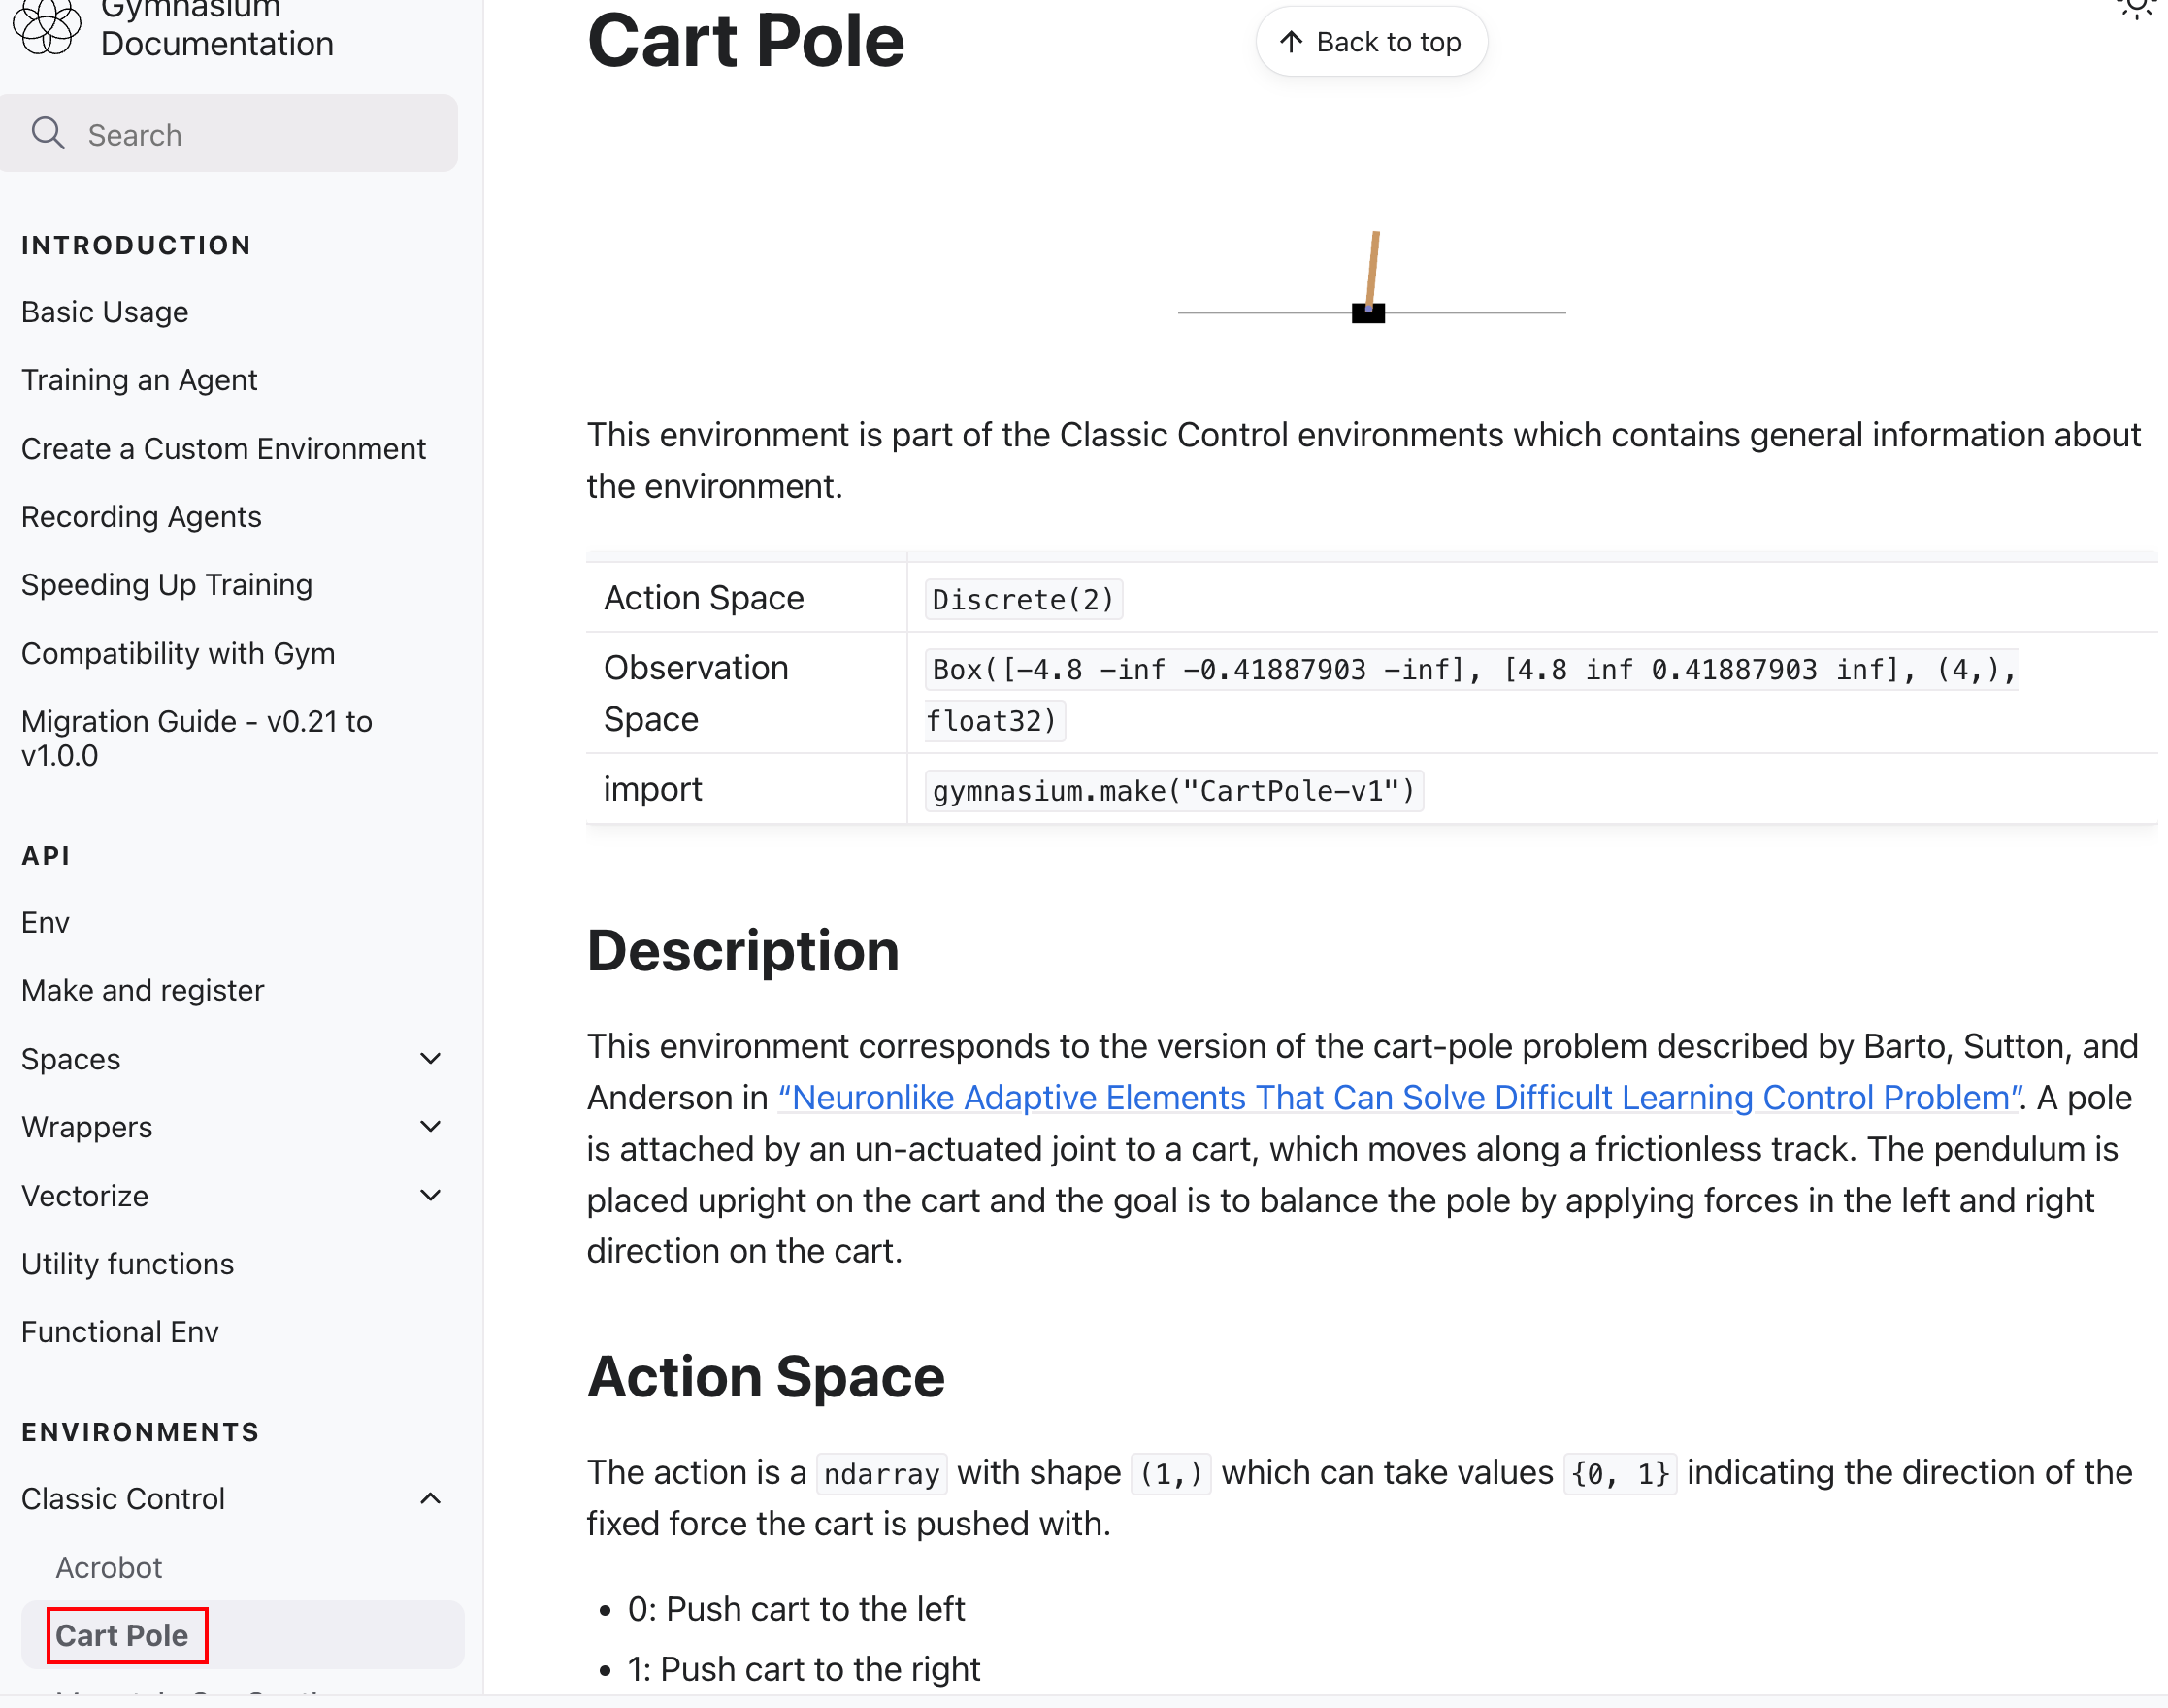

在使用时，我们主要关注几点：

* 需要输入的action和输出的state的具体维度，不同环境输出的格式可能不同，需要在算法侧进行规范处理，否则在计算损失函数时可能会出现错误。
* 每个环境都有一个`reset()`函数，用于初始化环境，返回初始状态，这个必须在每个episode开始时调用。
* 每个环境都有一个`step(action)`函数，用于执行一个动作，返回下一个状态、奖励、是否结束、额外信息。
* 每个环境的奖励计算方式可能不同，以及达到终止状态的条件也可能不同，有需要的同学可以查看源码进行详细了解，对于初学者则暂时不需要关心
